## Setup and Import Libraries

In [1]:
import os
from langchain_groq import ChatGroq
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import TypedDict
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["LANGSMITH_API_KEY"] = os.getenv("LANGSMITH_API_KEY")
os.environ["LANGSMITH_TRACING"] = os.getenv("LANGSMITH_TRACING")
os.environ["LANGCHAIN_PROJECT"] = os.getenv("LANGCHAIN_PROJECT")

In [4]:
llm = ChatGroq(model_name="Gemma2-9b-It")

## Building Chatbot

In [6]:
class State(TypedDict):
    """
        Messages have the type 'list'. The 'add_messages' function in the annotation
        defines how this state key should be updated
        In this case, it appends messages to the list, rather than overwriting them
    """
    messages:Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [8]:
def chatbot(state: State):
    return {"messages":llm.invoke(state['messages'])}

In [9]:
graph_builder.add_node("Chatbot", chatbot)

In [10]:
graph_builder.add_edge(START, "Chatbot")
graph_builder.add_edge("Chatbot", END)

In [11]:
graph = graph_builder.compile()

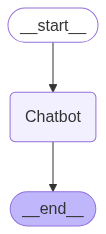

In [12]:
graph

In [14]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break

    for event in graph.stream({"messages":("user", user_input)}):
        print(event.values())
        for value in event.values():
            print(value['messages'])
            print("Assistant:", value["messages"].content)

User:  Hello


dict_values([{'messages': AIMessage(content='Hello! 😊\n\nHow can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 11, 'total_tokens': 25, 'completion_time': 0.025454545, 'prompt_time': 0.001909987, 'queue_time': 0.245562153, 'total_time': 0.027364532}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7e4a50b1-b98b-4b19-8777-87f154c0dac2-0', usage_metadata={'input_tokens': 11, 'output_tokens': 14, 'total_tokens': 25})}])
content='Hello! 😊\n\nHow can I help you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 11, 'total_tokens': 25, 'completion_time': 0.025454545, 'prompt_time': 0.001909987, 'queue_time': 0.245562153, 'total_time': 0.027364532}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-7e4a50b1-b98b-4b19-8777-8

User:  What is Generative AI


dict_values([{'messages': AIMessage(content='Generative AI is a type of artificial intelligence that focuses on **creating new content**. \n\nThink of it like this: instead of simply analyzing existing data, generative AI learns the underlying patterns and structures within that data and then uses that knowledge to generate something new. This "something new" can take many forms:\n\n* **Text:** Writing stories, poems, articles, dialogue, code, and more.\n* **Images:** Generating realistic photos, artwork, illustrations, and designs.\n* **Audio:** Composing music, creating sound effects, and even synthesizing human-like speech.\n* **Video:** Creating short animations, generating video clips from text descriptions, and even manipulating existing videos.\n* **3D models:** Designing objects, characters, and environments.\n\n**How does it work?**\n\nGenerative AI models are typically trained on massive datasets of existing content. They learn the relationships between different elements wit

User:  q


Good Bye
